In [1]:
# import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
# read the raw data for 2017 
csvpath = os.path.join("../Data/World_happiness_report/2017.csv")
happy_df = pd.read_csv(csvpath)
happy_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
# read the annual working hours raw data
csvpath = os.path.join("../Data/Working_hours/annual_working_hours.csv")
annual_hours_df = pd.read_csv(csvpath)
annual_hours_df.head()

,Entity,Code,Year,Average annual hours worked by persons engaged (hours per person engaged)
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [4]:
# rename columns for merging consistancy
annual_hours_df.columns=["Country","Code","Year","Annual hours worked per person"]

In [5]:
# locate 2017 for annual hours 
annual_2017 = annual_hours_df.loc[annual_hours_df["Year"]== 2017]

In [6]:
# merge two data sets 
all_happy_hours_df = pd.merge(happy_df, annual_2017, on="Country")
all_happy_hours_df.head(100)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Code,Year,Annual hours worked per person
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NOR,2017,1417.4723
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,DNK,2017,1400.3815
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,ISL,2017,1493.3651
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,CHE,2017,1589.6758
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,FIN,2017,1659.2806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Bangladesh,110,4.608,4.689822,4.526178,0.586683,0.735132,0.533241,0.478357,0.172255,0.123718,1.978736,BGD,2017,2232.3542
60,Myanmar,114,4.545,4.614740,4.475260,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.115290,MMR,2017,2437.8633
61,Sri Lanka,120,4.440,4.553447,4.326553,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,0.419389,LKA,2017,1923.9354
62,India,122,4.315,4.371522,4.258478,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117,IND,2017,2117.0117


The r-squared is: 0.3712874523847289


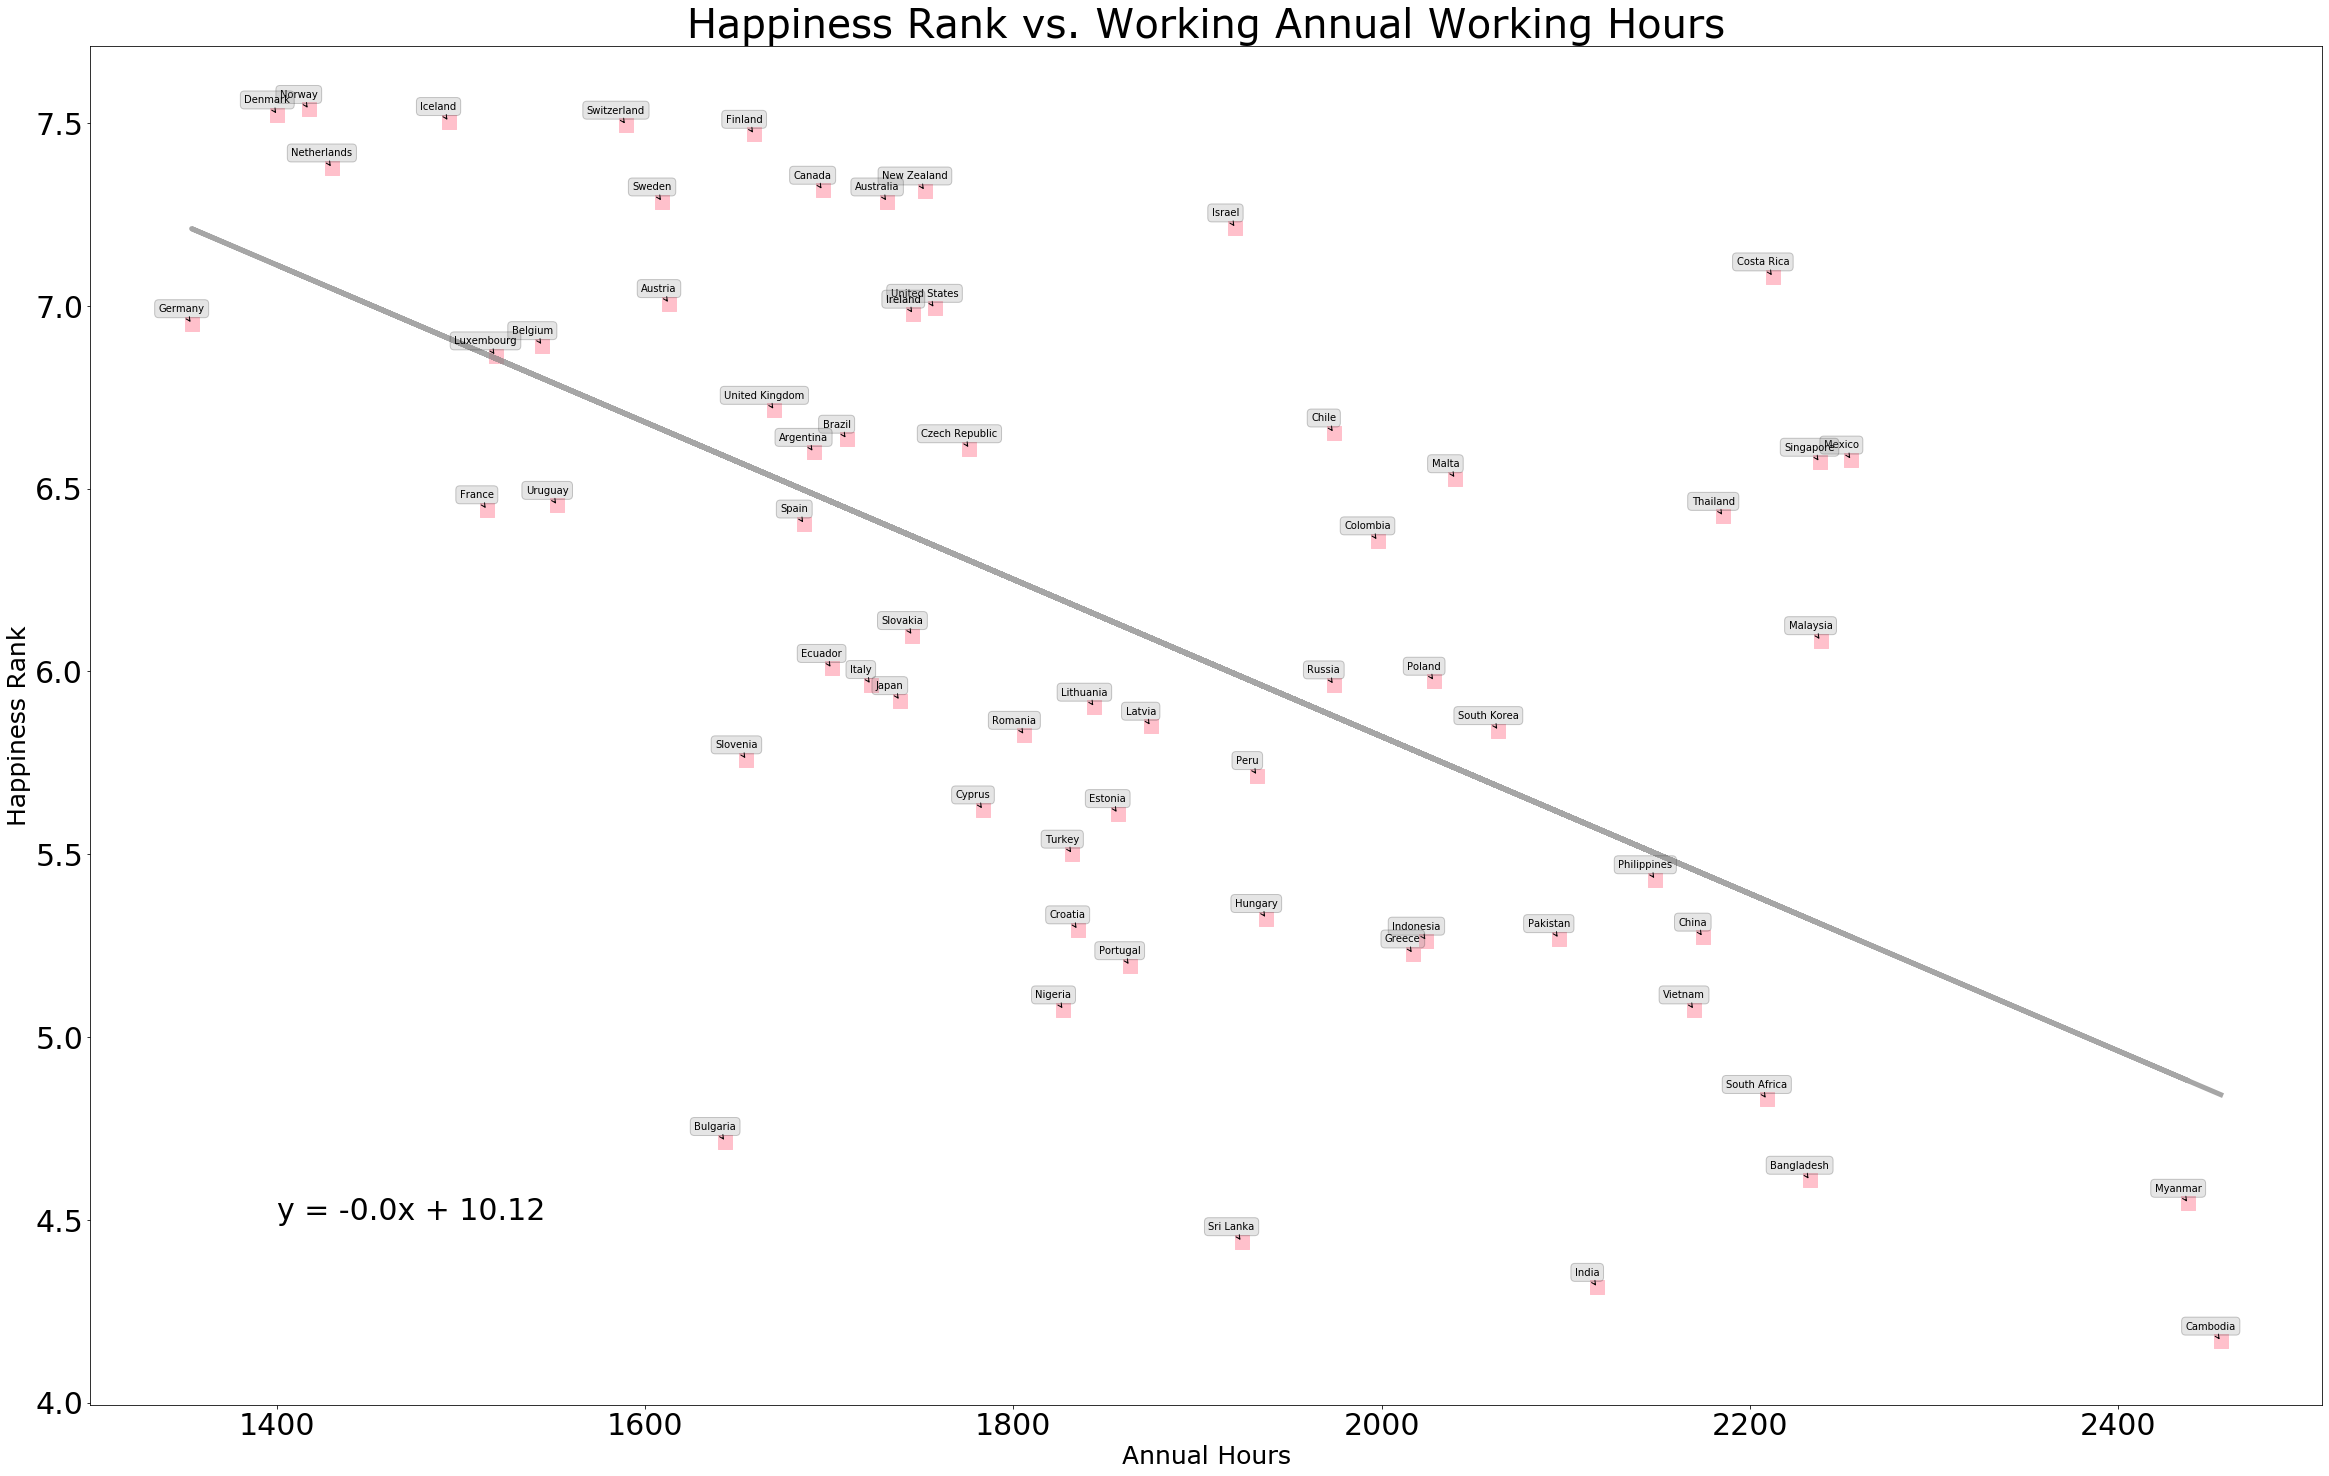

In [7]:
# make scatter plot for annual work hours and happiness 
labels = all_happy_hours_df["Country"]
x_values = all_happy_hours_df['Annual hours worked per person']
y_values = all_happy_hours_df['Happiness.Score']

plt.figure(figsize=(40,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Happiness Rank vs. Working Annual Working Hours",fontsize=40,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=25,fontname ="Verdana")
plt.ylabel("Happiness Rank",fontsize=25,fontname ="Verdana")


plt.scatter(x_values,y_values,color='pink',marker="s",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1400,4.5),fontsize=30,color="black")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))        


        

print(f"The r-squared is: {rvalue**2}")
plt.savefig("happiness_all.png")

The r-squared is: 0.571994328028218


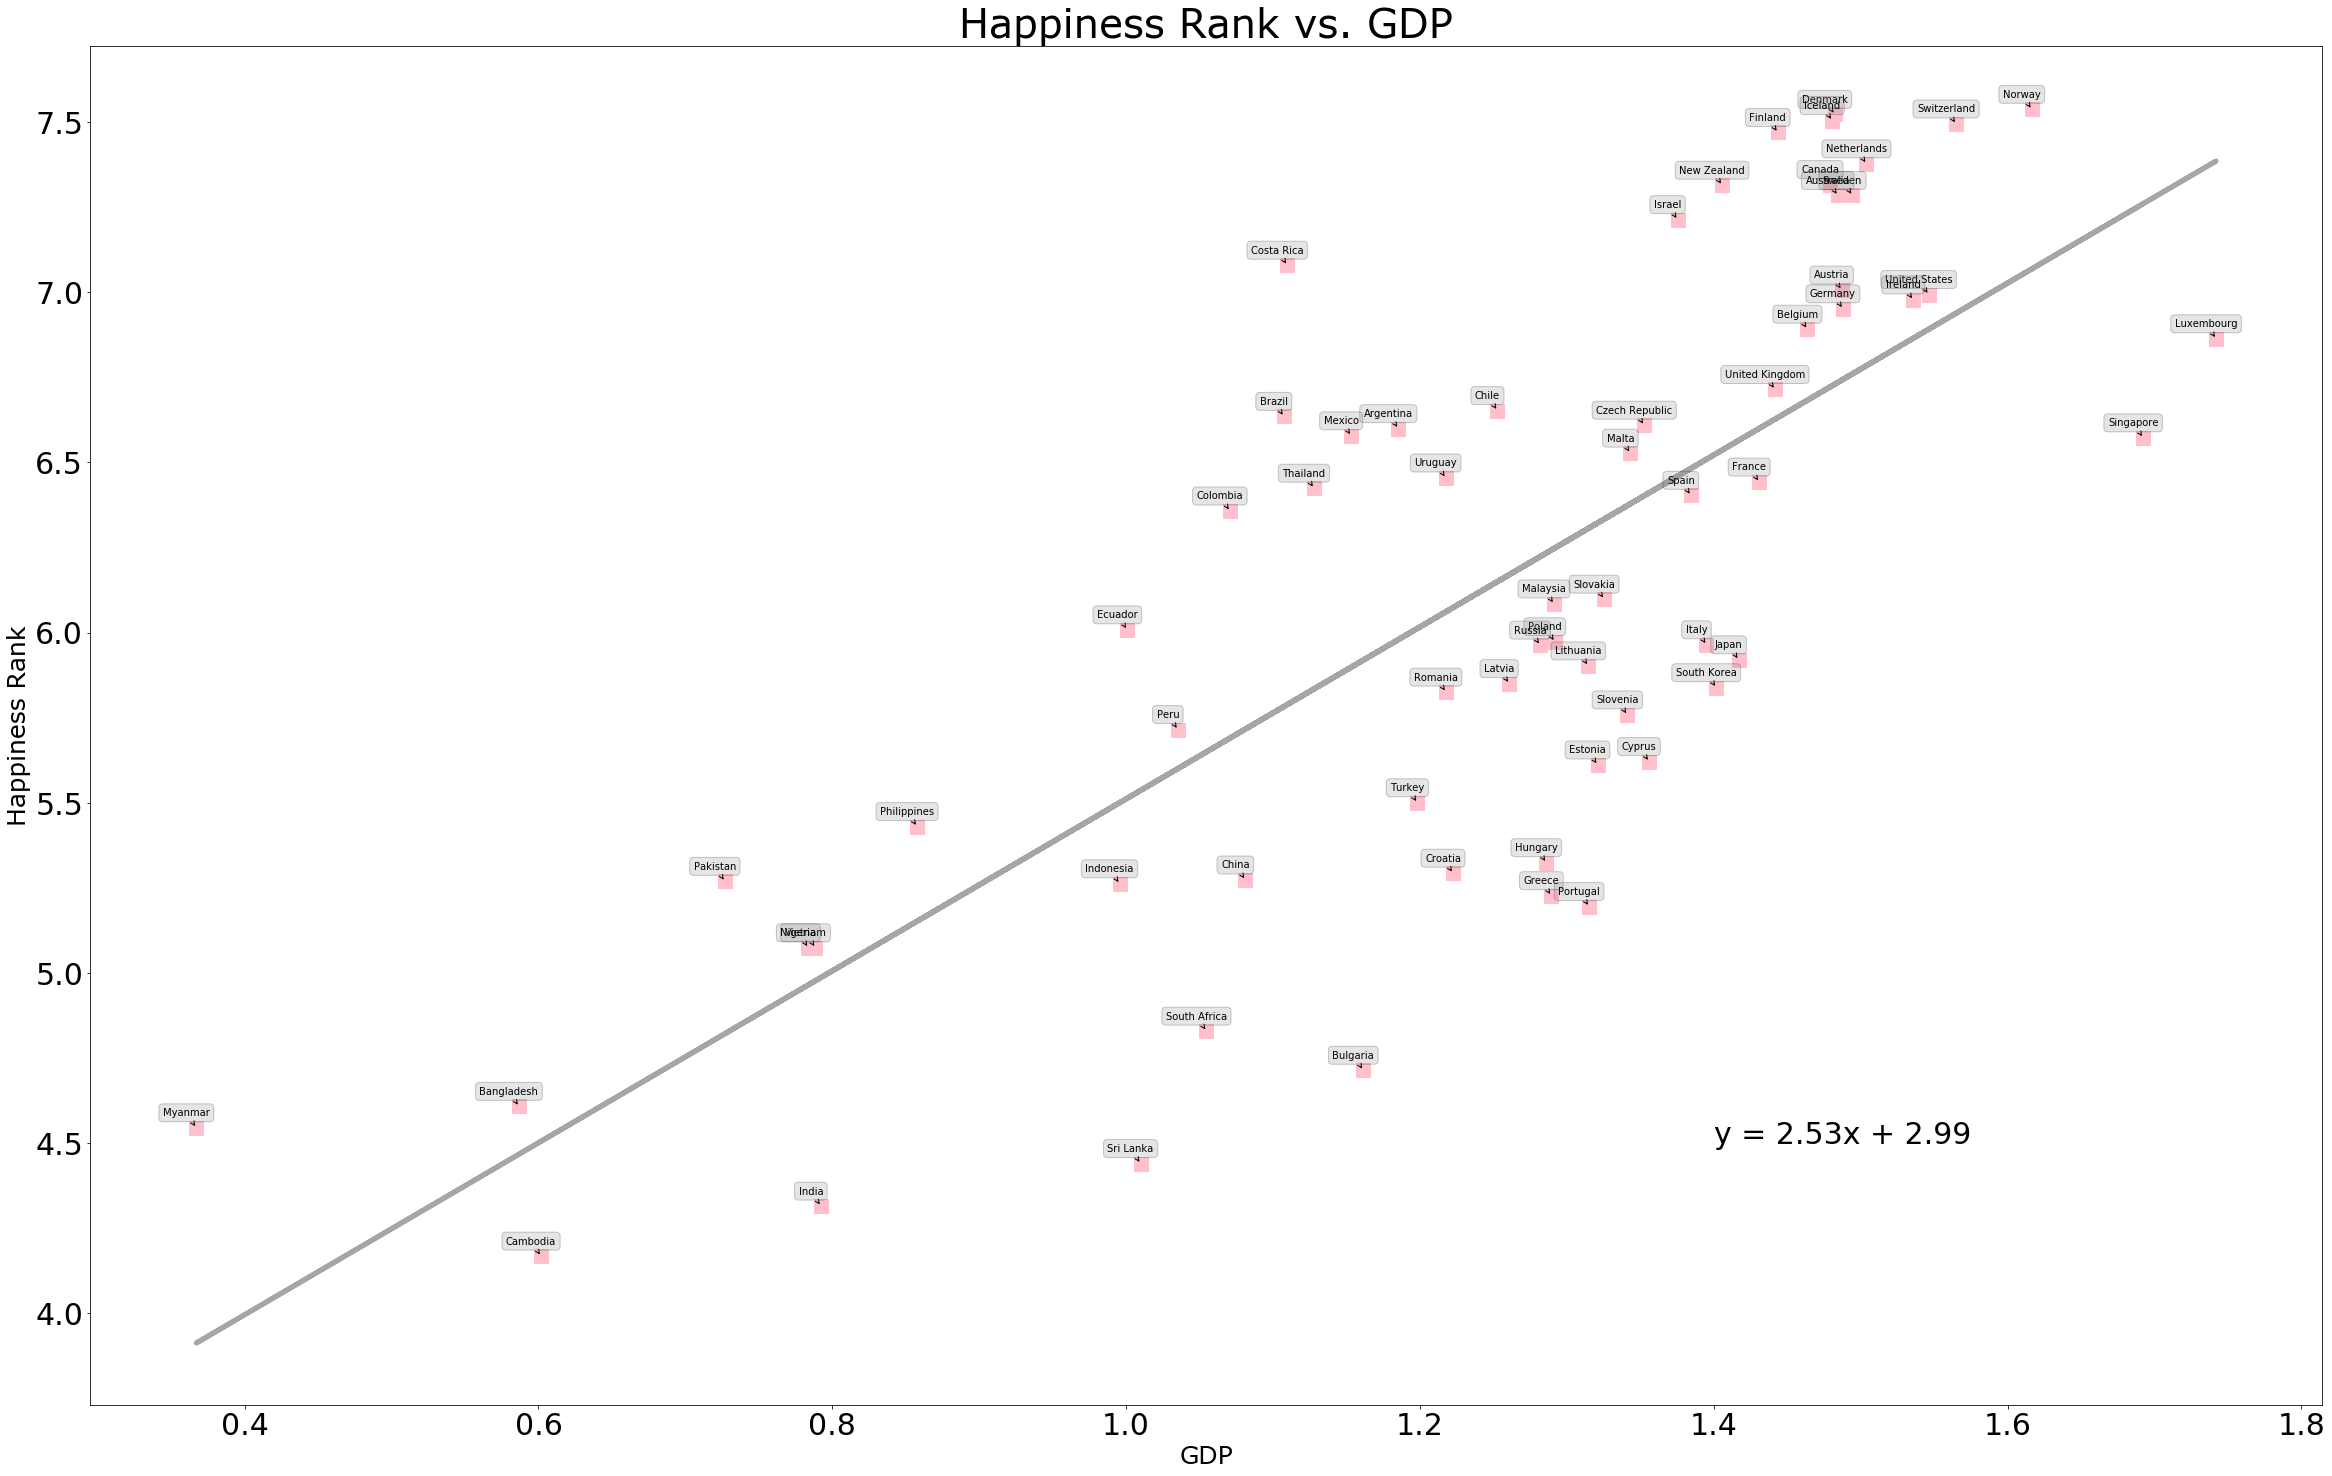

In [8]:
# extra: make scatter plot for GDP and happiness 
labels = all_happy_hours_df["Country"]
x_values = all_happy_hours_df['Economy..GDP.per.Capita.']
y_values = all_happy_hours_df['Happiness.Score']

plt.figure(figsize=(40,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Happiness Rank vs. GDP",fontsize=40,fontname ="Verdana")
plt.xlabel("GDP",fontsize=25,fontname ="Verdana")
plt.ylabel("Happiness Rank",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='pink',marker="s",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1.4,4.5),fontsize=30,color="black")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))        

print(f"The r-squared is: {rvalue**2}")
plt.savefig("happiness_gdp_all.png")

The r-squared is: 0.47284532291958614


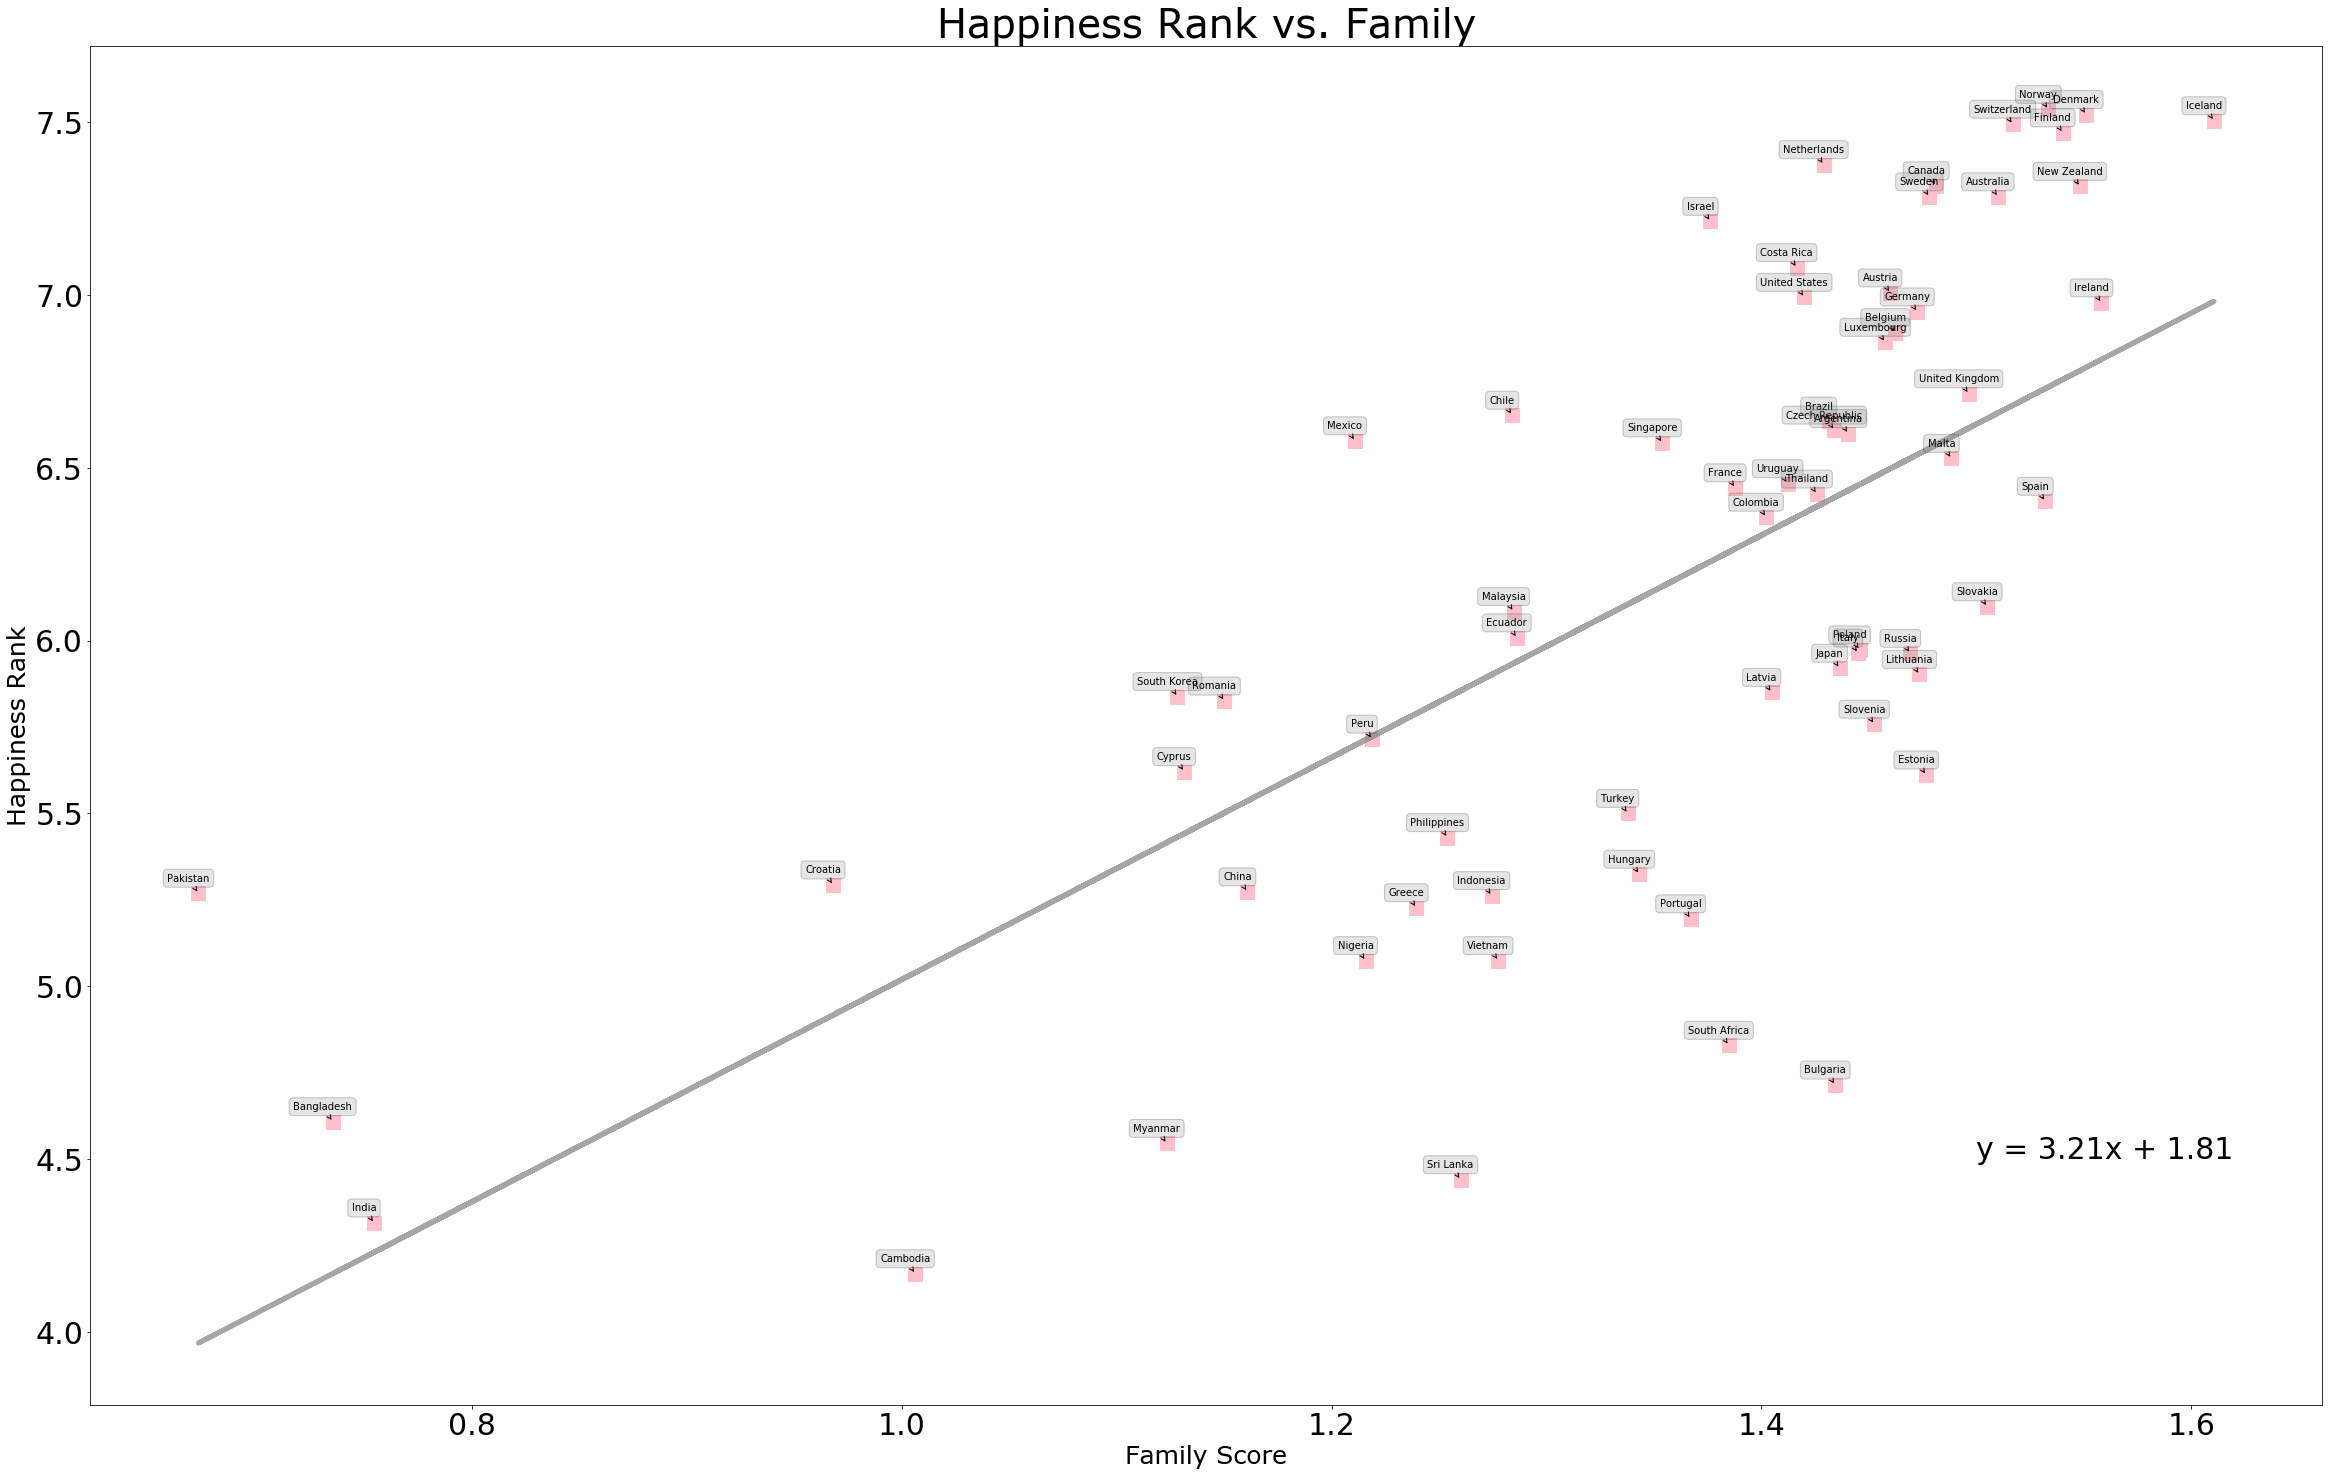

In [9]:
# extra: make scatter plot for family and happiness 
labels = all_happy_hours_df["Country"]
x_values = all_happy_hours_df['Family']
y_values = all_happy_hours_df['Happiness.Score']

plt.figure(figsize=(40,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Happiness Rank vs. Family",fontsize=40,fontname ="Verdana")
plt.xlabel("Family Score",fontsize=25,fontname ="Verdana")
plt.ylabel("Happiness Rank",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='pink',marker="s",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1.5,4.5),fontsize=30,color="black")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))        

print(f"The r-squared is: {rvalue**2}")
plt.savefig("happiness_family_all.png")

The r-squared is: 0.40239167552852445


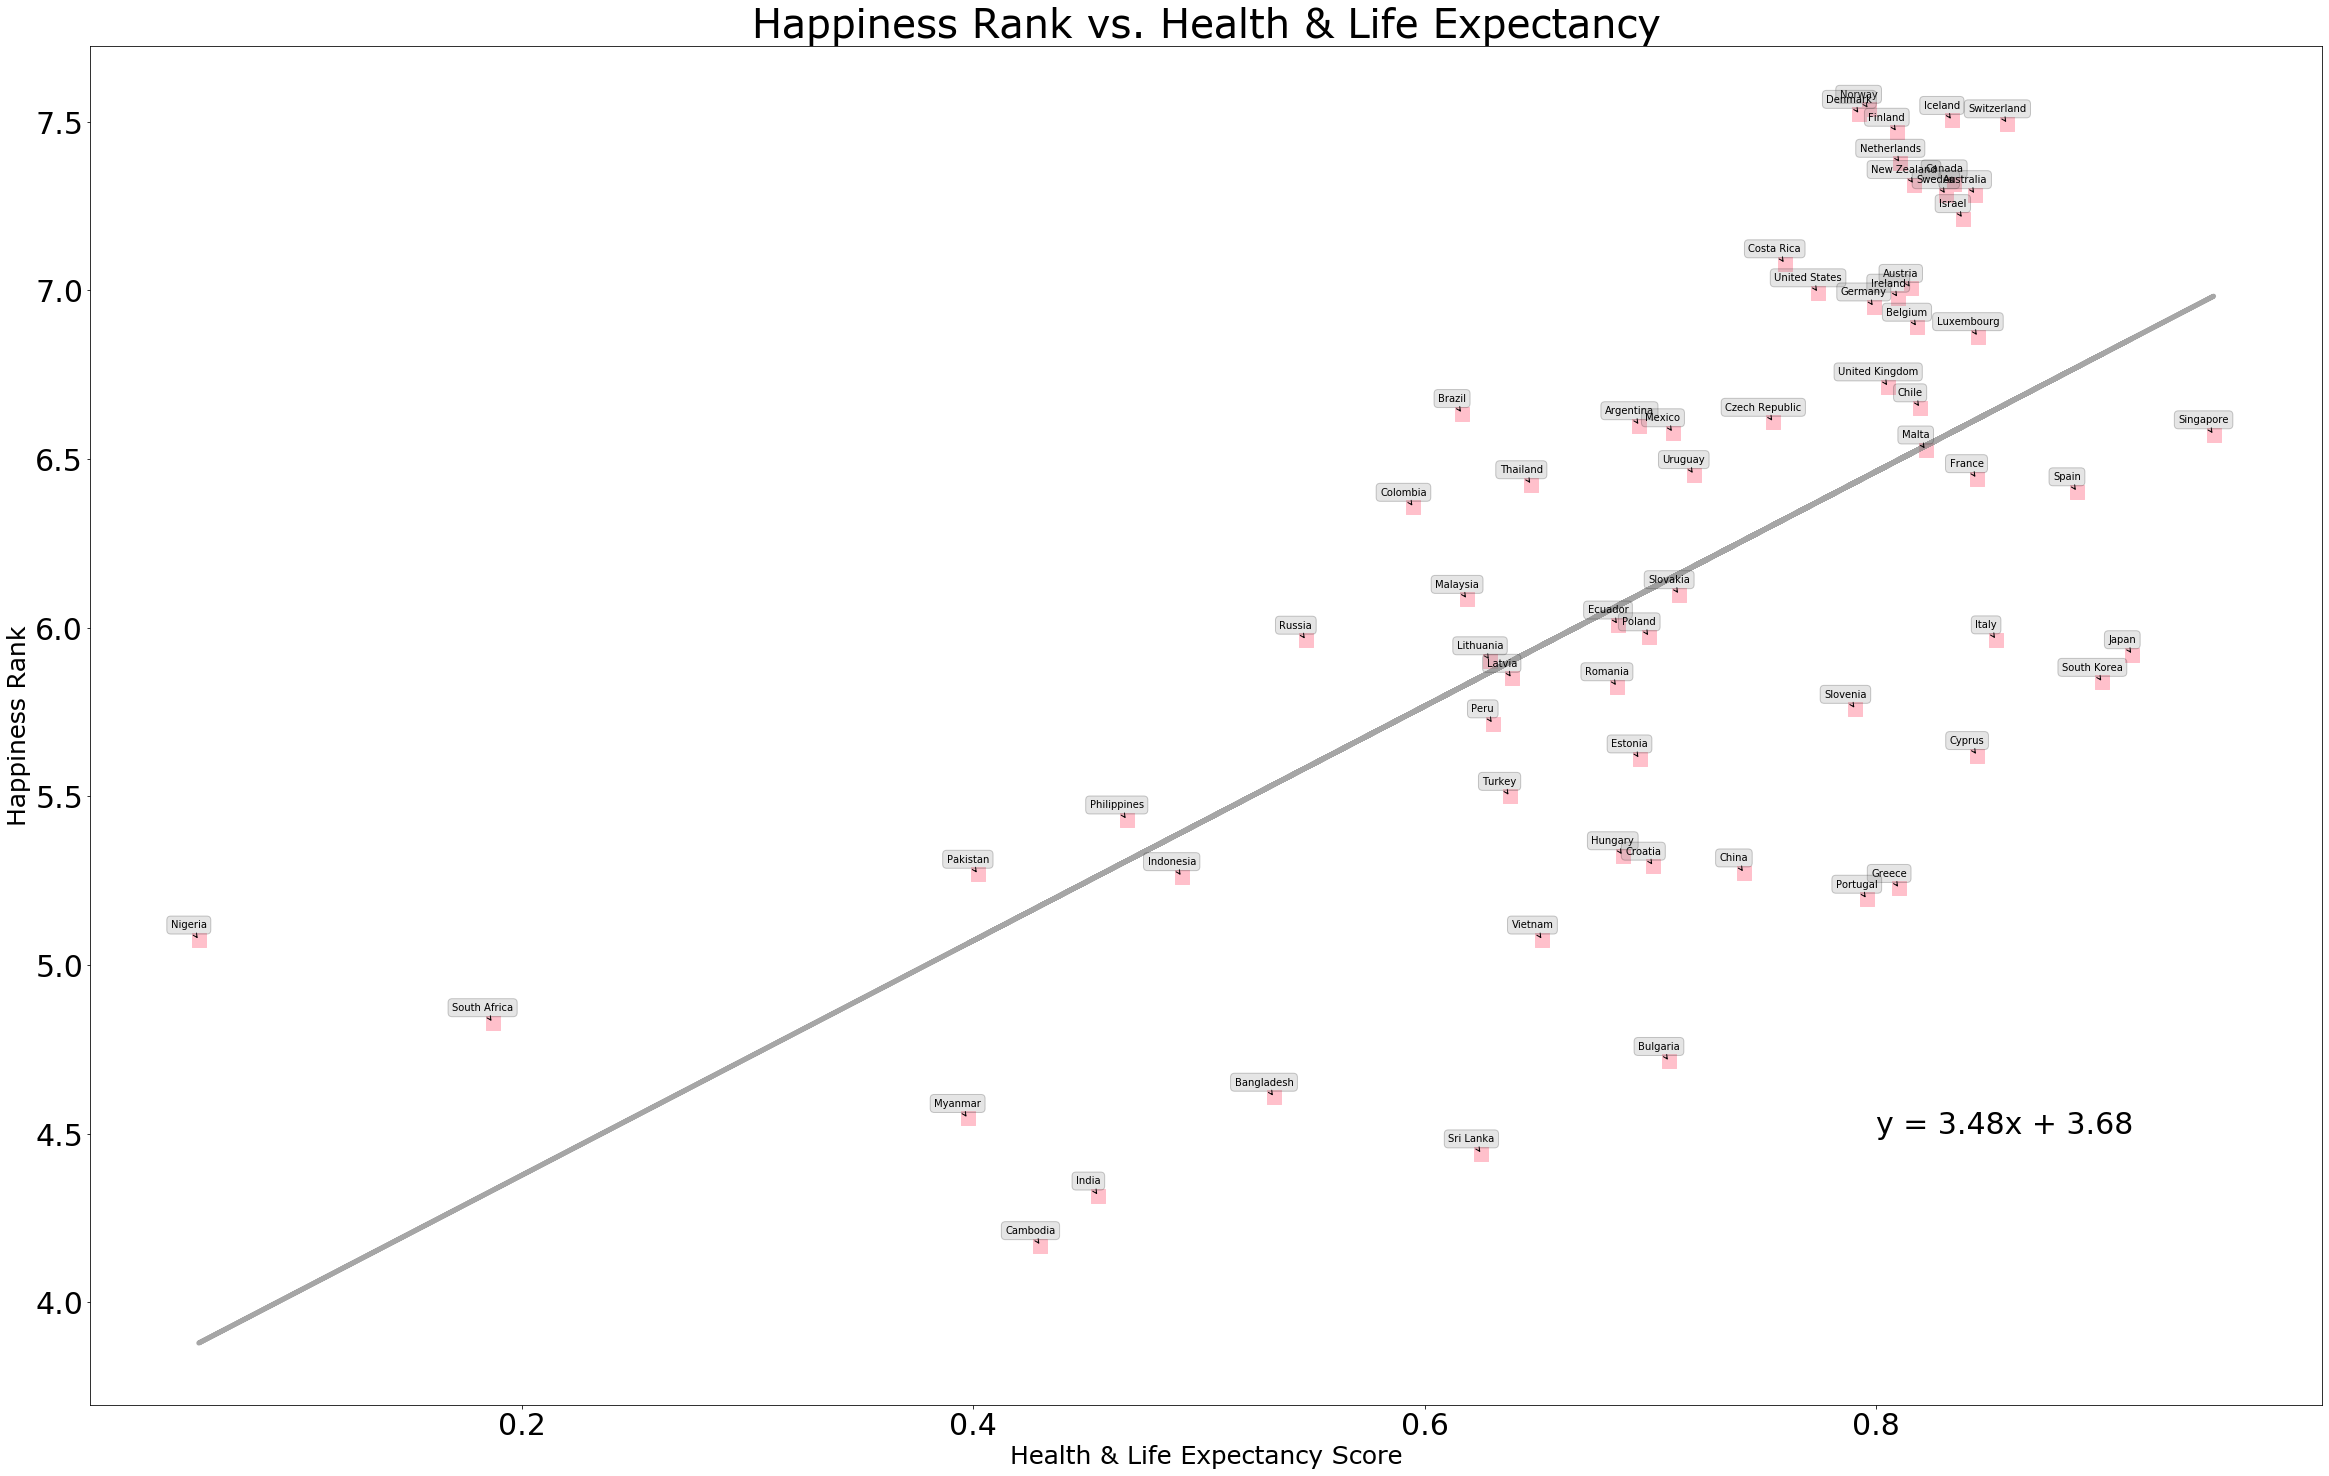

In [10]:
# extra: make scatter plot for health and happiness 
labels = all_happy_hours_df["Country"]
x_values = all_happy_hours_df['Health..Life.Expectancy.']
y_values = all_happy_hours_df['Happiness.Score']

plt.figure(figsize=(40,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Happiness Rank vs. Health & Life Expectancy",fontsize=40,fontname ="Verdana")
plt.xlabel("Health & Life Expectancy Score",fontsize=25,fontname ="Verdana")
plt.ylabel("Happiness Rank",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='pink',marker="s",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(.8,4.5),fontsize=30,color="black")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))        

print(f"The r-squared is: {rvalue**2}")
plt.savefig("happiness_health_all.png")

The r-squared is: 0.41204378403986835


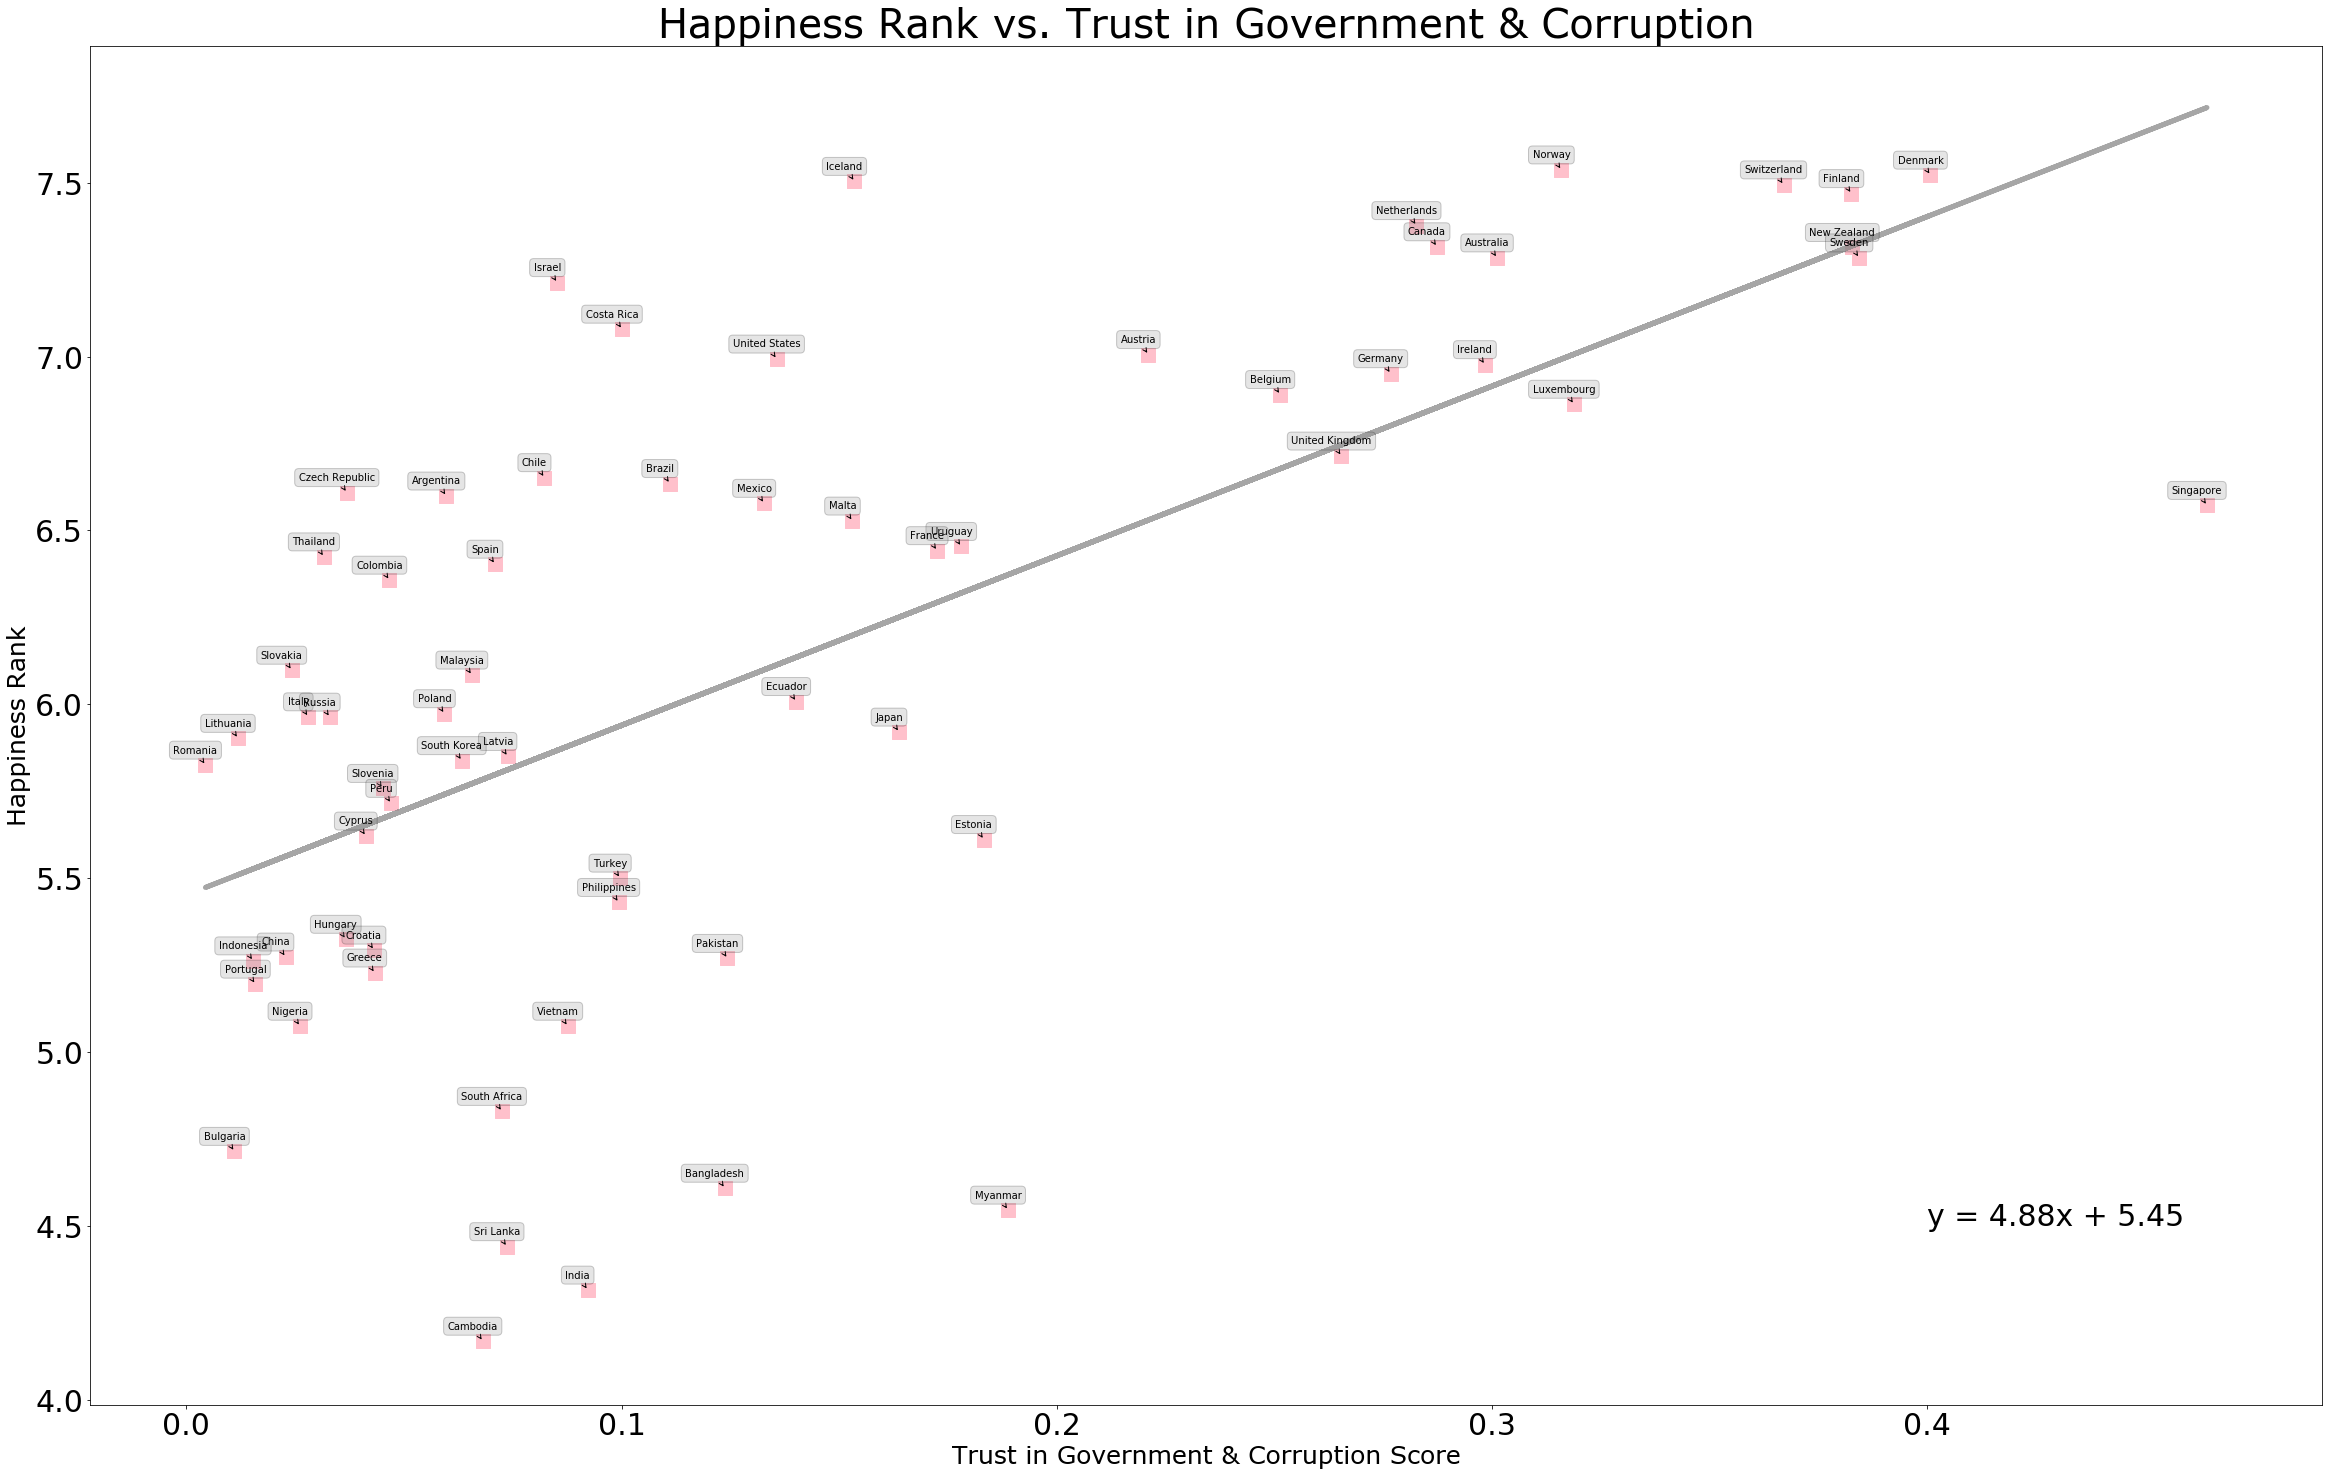

In [11]:
# extra: make scatter plot for government and happiness 
labels = all_happy_hours_df["Country"]
x_values = all_happy_hours_df['Trust..Government.Corruption.']
y_values = all_happy_hours_df['Happiness.Score']

plt.figure(figsize=(40,25))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Happiness Rank vs. Trust in Government & Corruption",fontsize=40,fontname ="Verdana")
plt.xlabel("Trust in Government & Corruption Score",fontsize=25,fontname ="Verdana")
plt.ylabel("Happiness Rank",fontsize=25,fontname ="Verdana")

plt.scatter(x_values,y_values,color='pink',marker="s",s=200)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(.4,4.5),fontsize=30,color="black")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 20),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='gray', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))        

print(f"The r-squared is: {rvalue**2}")
plt.savefig("happiness_gov_all.png")